The solution to $E_2(t)$ for the multi-dose 3-compartment model is given by

\begin{align*}
    E_2(t)&=k_1k_2\sum_{i=1}^nD(t_i)H(t-t_i)\left[\frac{e^{-k_1(t-t_i)}}{(k_1-k_2)(k_1-k_3)} - \frac{e^{-k_2(t-t_i)}}{(k_1-k_2)(k_2-k_3)} + \frac{e^{-k_3(t-t_i)}}{(k_1-k_3)(k_2-k_3)}\right]\\
    &~~~~+\frac{k_2}{k_2-k_3}\sum_{i=1}^nA_{\rm eff}(t_i)H(t-t_i)\left[-e^{-k_2(t-t_i)}+e^{-k_3(t-t_i)}\right]+\sum_{i=1}^nE_2(t_i)H(t-t_i)e^{-k_3(t-t_i)}.
\end{align*}

# A Model of Constant Time Interval between Administration

For a constant time interval $T$ between $t_i$ and $t_{i+1}$ for all $i\in\mathbb Z$ and if we have the same the initial conditions for all $i$, i.e., $D(t_i)=D(t_0)$, $A_{\rm eff}(t_i)=A_{\rm eff}(t_0)$, and $E_2(t_i)=E_2(t_0)$, then we can write $E_2(t)$ as

\begin{align*}
    E_2(t)&=k_1k_2D(t_0)\sum_{i=1}^nH(t-iT)\left[\frac{e^{-k_1(t-iT)}}{(k_1-k_2)(k_1-k_3)} - \frac{e^{-k_2(t-iT)}}{(k_1-k_2)(k_2-k_3)} + \frac{e^{-k_3(t-iT)}}{(k_1-k_3)(k_2-k_3)}\right]\\
    &~~~~+\frac{k_2A_{\rm eff}(t_0)}{k_2-k_3}\sum_{i=1}^nH(t-iT)\left[-e^{-k_2(t-iT)}+e^{-k_3(t-iT)}\right]+E_2(t_0)\sum_{i=1}^nH(t-iT)e^{-k_3(t-iT)}.
\end{align*}

## Steady-State Solution

(The following derivation follows closely to that given by [alix](https://discord.com/channels/438306949285806082/1201973466845151362/1202012880883683328) on the TransDIY Discord server.)

Summation of the form $S(t,k)=\sum_{i=1}^nH(t-iT)e^{ikT}>0$ only when $t\ge iT$ due to the definition of the Heaviside function $H(t-iT)=\begin{cases}1&{\rm if}~t\ge iT\\0&{\rm if}~t<iT\end{cases}$. i.e., $S(t,k)>0$ only when $i\le\operatorname{floor}(t/T)$, and $S(t,k)=0$ when $i>\operatorname{floor}(t/T)$.

Shifting time $t$ to cover all of $\mathbb R$, then we can write $$S(t,k)=\sum_{i=-\infty}^\infty H(t-iT)e^{ikT},$$ except the Heaviside $H(t-iT)$ tells us that $S(t,k)=0$ when $i>\operatorname{floor}(t/T)$, so

\begin{align*}
    S(t,k)&=\sum_{i=-\infty}^{\operatorname{floor}(t/T)}e^{ikT}\\
    &=\sum_{i=-\infty}^0e^{kT[i+\operatorname{floor}(t/T)]}\\
    &=\sum_{i=-\infty}^0e^{ikT}e^{kT\operatorname{floor}(t/T)}\\
    &=e^{kT\operatorname{floor}(t/T)}\sum_{i=0}^\infty e^{-ikT}\\
    &=e^{kT\operatorname{floor}(t/T)}\sum_{i=0}^\infty \left(e^{-kT}\right)^i\\
    &=\frac{e^{kT\operatorname{floor}(t/T)}}{1-e^{-kT}},
\end{align*} where the last line follows from $\sum_{i=0}^\infty \left(e^{-kT}\right)^i$ being the summation of the [geometric series](https://en.wikipedia.org/wiki/Geometric_series#Sum) $\sum_{k=0}^\infty ar^k=\frac a{1-r}$ for $|r|<1$, and thus is valid for $e^{-kT}<1$.

Thus, we have the steady-state solution for $E_2(t)$

\begin{align*}
    E_2^{\rm ss}(t)&=k_1k_2D(t_0)\left[\frac{e^{-k_1(t-T\operatorname{floor}(t/T))}}{\left(1-e^{-k_1T}\right)(k_1-k_2)(k_1-k_3)} - \frac{e^{-k_2(t-T\operatorname{floor}(t/T))}}{\left(1-e^{-k_2T}\right)(k_1-k_2)(k_2-k_3)} + \frac{e^{-k_3(t-T\operatorname{floor}(t/T))}}{\left(1+e^{-k_3T}\right)(k_1-k_3)(k_2-k_3)}\right]\\\\
    &~~~~+\frac{k_2A_{\rm eff}(t_0)}{k_2-k_3}\left[-\frac{e^{-k_2(t-T\operatorname{floor}(t/T))}}{1-e^{-k_2T}}+\frac{e^{-k_3(t-T\operatorname{floor}(t/T))}}{1-e^{-k_3T}}\right]+E_2(t_0)\frac{e^{-k_3(t-T\operatorname{floor}(t/T))}}{1-e^{-k_3T}}.
\end{align*}

For simplicity, we will set $A_{\rm eff}(t_0)=0$. We further take the measurement at initial time $t_0$ to be zero and subtract that from all future measurements, with anything less than zero set to be equal to zero. Doing so allows us to set $E_2(t_0)=0$. Without setting these two initial conditions to zero, the MCMC sampler tends to explore parts of the parameter space that don't match what you see from the data a bit too much.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from lmfit import Model
#from scipy.optimize import curve_fit    # least squares method won't give a good fit
import lmfit
import corner

In [2]:
# import and visualize data

MylanTDPDays100 = np.genfromtxt('Data/DailyMed_MylanTDP_n36/MylanTDP_n36_100mcg.csv', delimiter=',', skip_header=True)
MylanTDPDays50 = np.genfromtxt('Data/DailyMed_MylanTDP_n36/MylanTDP_n36_50mcg.csv', delimiter=',', skip_header=True)
MylanTDPDays25 = np.genfromtxt('Data/DailyMed_MylanTDP_n36/MylanTDP_n36_25mcg.csv', delimiter=',', skip_header=True)

H2003aN30Estradot100 = np.genfromtxt('Data/Hossain2003a_Estradot_n30/H2003a_Estradot_n30_100mcg.csv', delimiter=',', skip_header=True)
H2003aN30Estradot50 = np.genfromtxt('Data/Hossain2003a_Estradot_n30/H2003a_Estradot_n30_50mcg.csv', delimiter=',', skip_header=True)
H2003aN30Estradot37_5 = np.genfromtxt('Data/Hossain2003a_Estradot_n30/H2003a_Estradot_n30_37.5mcg.csv', delimiter=',', skip_header=True)
H2003aN30Estradot25 = np.genfromtxt('Data/Hossain2003a_Estradot_n30/H2003a_Estradot_n30_25mcg.csv', delimiter=',', skip_header=True)

H2003bN11Estradot100 = np.genfromtxt('Data/Hossain2003b_Estradot_n11/H2003b_Estradot_n11_100mcg.csv', delimiter=',', skip_header=True)
H2003bN11Estradot50 = np.genfromtxt('Data/Hossain2003b_Estradot_n11/H2003b_Estradot_n11_50mcg.csv', delimiter=',', skip_header=True)

# exclude n = 30 study from H2003b due to the initial measurement being higher than the second measurement
#H2003bN30Estradot50 = np.genfromtxt('Data/Hossain2003b_Estradot_n30/H2003b_Estradot_n30_50mcg.csv', delimiter=',', skip_header=True)

In [3]:
# convert Mylan data from days to hrs, Estradot data is already in hrs
# https://stackoverflow.com/questions/10394659/how-to-add-a-calculated-computed-column-in-numpy

MylanTDP100 = np.vstack((MylanTDPDays100[:,0]*24, MylanTDPDays100[:,1])).T
MylanTDP50 = np.vstack((MylanTDPDays50[:,0]*24, MylanTDPDays50[:,1])).T
MylanTDP25 = np.vstack((MylanTDPDays25[:,0]*24, MylanTDPDays25[:,1])).T

In [6]:
# a function to normalize the data

def Nor(data):
    t = data[:,0]
    y = data[:,1]
    yout = np.zeros(np.size(y))
    for i in range(np.size(y)):
        yout[i] = y[i] - y[0]

        # to ensure all measurements are \ge0
        if yout[i]<0:
            yout[i] = 0
        else:
            pass

    return yout

In [11]:
MylanTDP100Nor = Nor(MylanTDP100)
MylanTDP50Nor = Nor(MylanTDP50)
MylanTDP25Nor = Nor(MylanTDP25)

H2003aN30Estradot100Nor = Nor(H2003aN30Estradot100)
H2003aN30Estradot50Nor = Nor(H2003aN30Estradot50)
H2003aN30Estradot37_5Nor = Nor(H2003aN30Estradot37_5)
H2003aN30Estradot25Nor = Nor(H2003aN30Estradot25)

H2003bN11Estradot100Nor = Nor(H2003bN11Estradot100)
H2003bN11Estradot50Nor = Nor(H2003bN11Estradot50)

In [13]:
# fitting using single-dose model, A_{\rm eff}(t_0) = 0 and E_2(t_0) = 0

def E2(t, d0, k1, k2, k3):
    summation = 0
    innerFunc1 = np.exp(-k1 * t) / ((k1 - k2) * (k1 - k3))
    innerFunc2 = np.exp(-k2 * t) / ((k1 - k2) * (k2 - k3))
    innerFunc3 = np.exp(-k3 * t) / ((k1 - k3) * (k2 - k3))
    summation = d0 * (innerFunc1 - innerFunc2 + innerFunc3)
    return k1 * k2 * summation

In [65]:
# steady-state solution, A_{\rm eff}(t_0) = 0 and E_2(t_0) = 0

def E2ss(t, D0, k1, k2, k3, T):
    innerFunc1 = np.exp(-k1 * (t - T * np.floor(t/T))) / ((1 - np.exp(-k1*T)) * (k1 - k2) * (k1 - k3))
    innerFunc2 = np.exp(-k2 * (t - T * np.floor(t/T))) / ((1 - np.exp(-k2*T)) * (k1 - k2) * (k2 - k3))
    innerFunc3 = np.exp(-k3 * (t - T * np.floor(t/T))) / ((1 - np.exp(-k3*T)) * (k1 - k3) * (k2 - k3))
    return k1 * k2 * D0 * (innerFunc1 - innerFunc2 + innerFunc3)

# 100 $\rm\mu g$ Mylan Estradiol TDP

In [16]:
Mylan100Model = Model(E2)
print(f'parameter names: {Mylan100Model.param_names}')
print(f'independent variables: {Mylan100Model.independent_vars}')

parameter names: ['d0', 'k1', 'k2', 'k3']
independent variables: ['t']


In [17]:
# k_i can be greater than 1, from the likelihood surface using emcee in the single-dose model

Mylan100Params = Mylan100Model.make_params(d0=dict(value=100,min=0,max=250),
                                           k1=dict(value=1/(100/24),min=0,max=10),
                                           k2=dict(value=2,min=0,max=10),
                                           k3=dict(value=1/37,min=0,max=10))
#Mylan100Model.set_param_hint('ti', vary=False)

# need some extra help from lmfit to make theta usable with mcmc
Mylan100Fit = Mylan100Model.fit(data=MylanTDP100[:,1], params=Mylan100Params, t=MylanTDP100[:,0])

In [18]:
# https://lmfit.github.io/lmfit-py/examples/example_emcee_Model_interface.html
# burn means it's discarding the first 500 iterations/samples, and ...
# ... thin means its keeping every 20th sample, i.e. (10,000 - 500)/20 = 475, ...
# ... from result_emcee.lnprob.shape: (475, 100)
# see https://lmfit.github.io/lmfit-py/fitting.html#lmfit.minimizer.Minimizer.emcee

emcee_kws = dict(steps=10000, burn=500, thin=20, is_weighted=False)
emcee_params = Mylan100Fit.params.copy()

# __lnsigma is the log of the standard deviation, here ~50 to 100, https://discord.com/channels/438306949285806082/438308040446574592/1200639243274440735
# __lnsigma characterizes the width/average error between the curves and the datapoints
# here, they also used the log trick to enforce the constraint that the standard deviation sigma should always be greater than 0
# it's the sigma in the gaussian model sum over datapoints (xi, ti)  exp(-1/2(xi - e2(ti, D0, k1, k2, k3))^2/sigma^2)/sqrt(2pi sigma^2)
# and they parametrize sigma = exp(__lnsigma)
# so a large sigma is more permissive in terms of the square error (xi - e2)^2, it penalizes large difference between the datapoint and the curve less.

emcee_params.add('__lnsigma', value=np.log(0.1), min=np.log(0.001), max=np.log(50))

In [19]:
result_emcee = Mylan100Model.fit(data=MylanTDP100[:,1], t=MylanTDP100[:,0],
                                 params=emcee_params, method='emcee',
                                 nan_policy='omit', fit_kws=emcee_kws)

100%|█████████████████████████████████████| 10000/10000 [01:48<00:00, 91.95it/s]


The chain is shorter than 50 times the integrated autocorrelation time for 3 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 200;
tau: [204.94197662 491.3262649  296.11157513 162.22246334  61.96312759]


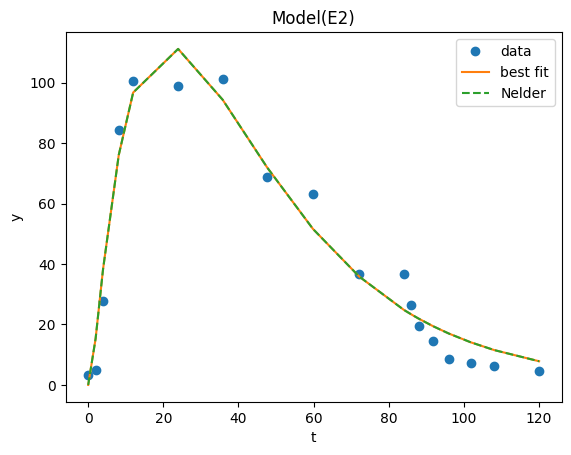

In [20]:
result_emcee.plot_fit()
plt.plot(MylanTDP100[:,0], Mylan100Model.eval(params=result_emcee.params, t=MylanTDP100[:,0]), '--', label='Nelder')
plt.legend()

[[Fit Statistics]]
    # fitting method   = emcee
    # function evals   = 1000000
    # data points      = 18
    # variables        = 5
    chi-square         = 13.4018244
    reduced chi-square = 1.03090957
    Akaike info crit   = 4.69034354
    Bayesian info crit = 9.14220233
    R-squared          = 0.99940872
[[Variables]]
    d0:         215.540614 +/- 25.9052990 (12.02%) (init = 222.2217)
    k1:         0.07321976 +/- 0.02745403 (37.50%) (init = 0.07268049)
    k2:         0.89829663 +/- 1.93846576 (215.79%) (init = 0.633504)
    k3:         0.03280494 +/- 0.00429022 (13.08%) (init = 0.03377079)
    __lnsigma:  2.15440135 +/- 0.19645103 (9.12%) (init = -2.302585)
[[Correlations]] (unreported correlations are < 0.100)
    C(d0, k3)        = +0.8093
    C(k2, __lnsigma) = +0.2602
    C(d0, k2)        = +0.1927
    C(k2, k3)        = +0.1804
    C(k1, k2)        = -0.1520
    C(d0, __lnsigma) = -0.1238


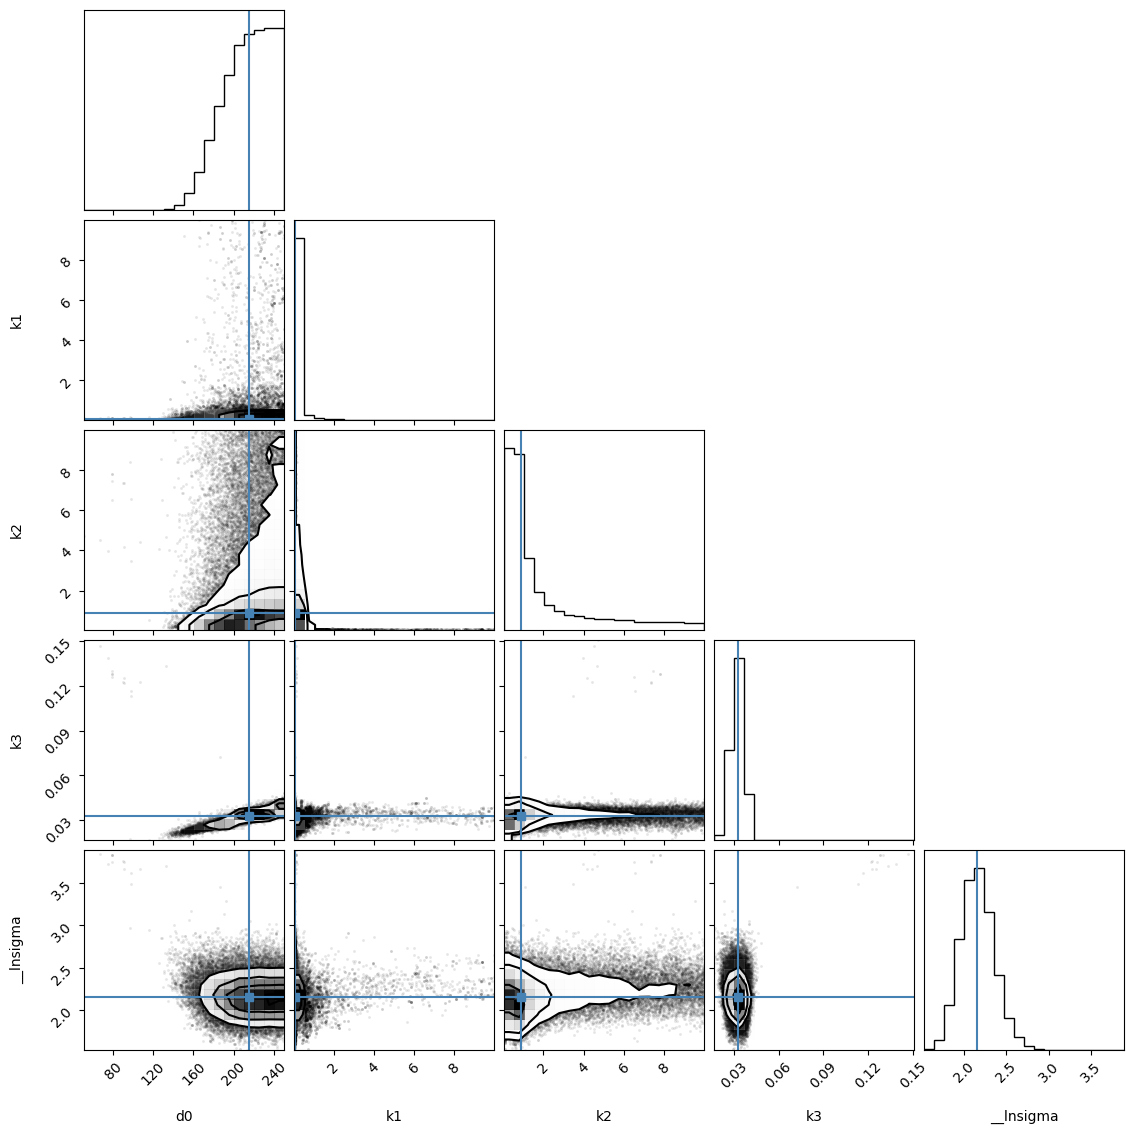

In [21]:
lmfit.report_fit(result_emcee)
emcee_corner = corner.corner(result_emcee.flatchain, labels=result_emcee.var_names,
                             truths=list(result_emcee.params.valuesdict().values()))

In [23]:
# https://lmfit.github.io/lmfit-py/fitting.html#lmfit.minimizer.Minimizer.emcee
# The result from emcee reports the median values, ...
# ... which are not necessarily the same as the Maximum Likelihood Estimate. ...
# ... To obtain the values for the Maximum Likelihood Estimation (MLE) we find ...
# ... the location in the chain with the highest probability
for i, par in enumerate(emcee_params):
    emcee_params[par].value = mle_soln[i]

print('\nMaximum Likelihood Estimation from emcee       ')
print('-------------------------------------------------')
print('Parameter  MLE Value   Median Value   Uncertainty')
fmt = '  {:5s}  {:11.5f} {:11.5f}   {:11.5f}'.format
for name, param in emcee_params.items():
    print(fmt(name, param.value, result_emcee.params[name].value,
              result_emcee.params[name].stderr))


Maximum Likelihood Estimation from emcee       
-------------------------------------------------
Parameter  MLE Value   Median Value   Uncertainty
  d0       224.80398   215.54061      25.90530
  k1         0.07172     0.07322       0.02745
  k2         0.64738     0.89830       1.93847
  k3         0.03412     0.03280       0.00429
  __lnsigma      1.96951     2.15440       0.19645


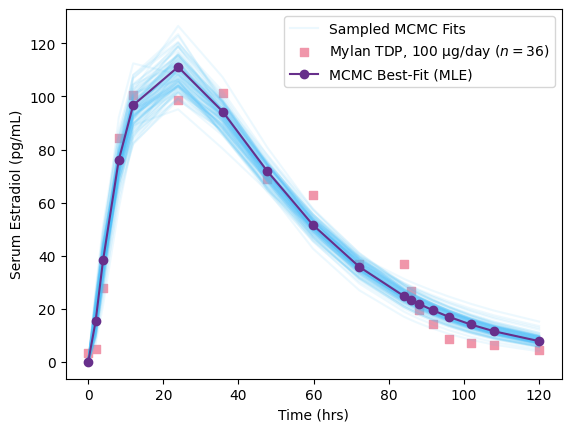

In [26]:
inds = np.random.randint(len(result_emcee.flatchain), size=100)

for ind in inds:
    sample = (result_emcee.flatchain["d0"][ind], result_emcee.flatchain["k1"][ind],
              result_emcee.flatchain["k2"][ind], result_emcee.flatchain["k3"][ind])
    plt.plot(MylanTDP100[:,0], E2(MylanTDP100[:,0], sample[0], sample[1], sample[2], sample[3]), alpha=0.1, color='#4EC2F8')
plt.plot(MylanTDP100[:,0], E2(MylanTDP100[:,0], sample[0], sample[1], sample[2], sample[3]), alpha=0.1, color='#4EC2F8', label='Sampled MCMC Fits')
plt.scatter(MylanTDP100[:,0], MylanTDP100[:,1], color='#F096AA', marker='s', label="Mylan TDP, 100 $\\rm\\mu g$/day ($n=36$)")
plt.plot(MylanTDP100[:,0], result_emcee.best_fit, label='MCMC Best-Fit (MLE)', color='#672F8B', marker='o')
plt.xlabel('Time (hrs)')
plt.ylabel('Serum Estradiol (pg/mL)')
plt.legend()
plt.show()

In [76]:
timeSS = np.arange(0,30*24,0.5)    # 30 days, in hrs
#Mylan100SS = E2ss(timeSS, emcee_params['d0'].value, emcee_params['k1'].value,
#                  emcee_params['k2'].value, emcee_params['k3'].value, 3.5*24)
#timeSSMin = np.zeros(np.size(timeSS))
#Mylan100SSMin = E2ss(timeSSMin, emcee_params['d0'].value, emcee_params['k1'].value,
#                  emcee_params['k2'].value, emcee_params['k3'].value, 3.5*24)

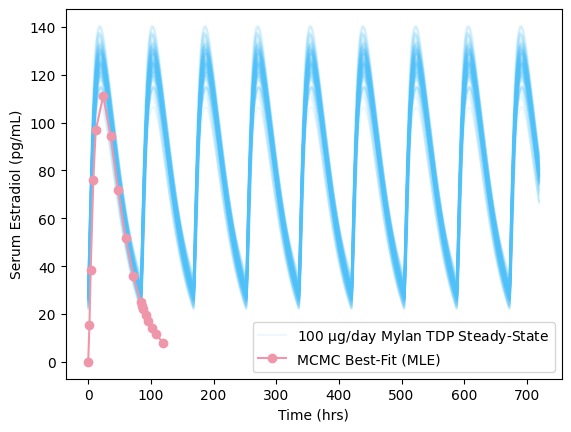

In [97]:
inds = np.random.randint(len(result_emcee.flatchain), size=100)

for ind in inds:
    sample = (result_emcee.flatchain["d0"][ind], result_emcee.flatchain["k1"][ind],
              result_emcee.flatchain["k2"][ind], result_emcee.flatchain["k3"][ind])
    plt.plot(timeSS, E2ss(timeSS, sample[0], sample[1], sample[2], sample[3], 3.5*24), alpha=0.1, color='#4EC2F8')
plt.plot(timeSS, E2ss(timeSS, sample[0], sample[1], sample[2], sample[3], 3.5*24), alpha=0.1, color='#4EC2F8', label='100 $\\rm\\mu g$/day Mylan TDP Steady-State')
#plt.plot(timeSS, Mylan100SS, label='100 $\\rm\\mu g$/day Mylan TDP Steady-State')
plt.plot(MylanTDP100[:,0], result_emcee.best_fit, label='MCMC Best-Fit (MLE)', color='#F096AA', marker='o')
#plt.plot(timeSS, Mylan100SSMin, label='Minimum of 100 $\\rm\\mu g$/day Mylan TDP')
#plt.ylim(0,130)
plt.xlabel('Time (hrs)')
plt.ylabel('Serum Estradiol (pg/mL)')
plt.legend()
plt.show()